In [14]:
library(GEOquery)
library(qvalue)
library(WGCNA)
library(limma)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust







Attaching package: ‘WGCNA’


The following object is masked from ‘package:qvalue’:

    qvalue


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
# Download the data
gse <- getGEO("GSE28746")

gse[[1]]

Found 1 file(s)

GSE28746_series_matrix.txt.gz



ExpressionSet (storageMode: lockedEnvironment)
assayData: 27578 features, 84 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM712302 GSM712303 ... GSM712385 (84 total)
  varLabels: title geo_accession ... sexual_orientation:ch1 (38 total)
  varMetadata: labelDescription
featureData
  featureNames: cg00000292 cg00002426 ... cg27665659 (27578 total)
  fvarLabels: ID Name ... ORF (38 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 21731603 
Annotation: GPL8490 

In [3]:
# Extract the phenoData
pheno_data <- gse[[1]]@phenoData@data
head(pheno_data)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age:ch1,pair id number:ch1,race:ch1,sexual_orientation:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM712302,111,GSM712302,Public on Apr 21 2011,Apr 20 2011,Apr 21 2011,genomic,1,saliva sample,Homo sapiens,pair id number: 1,⋯,Los Angeles,California,90095,USA,NONE,27578,40,1,White,Homosexual
GSM712303,112,GSM712303,Public on Apr 21 2011,Apr 20 2011,Apr 21 2011,genomic,1,saliva sample,Homo sapiens,pair id number: 1,⋯,Los Angeles,California,90095,USA,NONE,27578,40,1,White,Heterosexual
GSM712304,611,GSM712304,Public on Apr 21 2011,Apr 20 2011,Apr 21 2011,genomic,1,saliva sample,Homo sapiens,pair id number: 6,⋯,Los Angeles,California,90095,USA,NONE,27578,40,6,White,Homosexual
GSM712305,612,GSM712305,Public on Apr 21 2011,Apr 20 2011,Apr 21 2011,genomic,1,saliva sample,Homo sapiens,pair id number: 6,⋯,Los Angeles,California,90095,USA,NONE,27578,40,6,White,Heterosexual
GSM712306,811,GSM712306,Public on Apr 21 2011,Apr 20 2011,Apr 21 2011,genomic,1,saliva sample,Homo sapiens,pair id number: 8,⋯,Los Angeles,California,90095,USA,NONE,27578,39,8,White,Homosexual
GSM712307,812,GSM712307,Public on Apr 21 2011,Apr 20 2011,Apr 21 2011,genomic,1,saliva sample,Homo sapiens,pair id number: 8,⋯,Los Angeles,California,90095,USA,NONE,27578,39,8,White,Heterosexual


In [4]:
# Get CpG sites metadata
cpg_sites_meta <- gse[[1]]@featureData@data
head(cpg_sites_meta)

,ID,Name,IlmnStrand,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,GenomeBuild,Chr,MapInfo,⋯,Distance_to_TSS,CPG_ISLAND,CPG_ISLAND_LOCATIONS,MIR_CPG_ISLAND,RANGE_GB,RANGE_START,RANGE_END,RANGE_STRAND,GB_ACC,ORF
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
cg00000292,cg00000292,cg00000292,TOP,990370,AAACATTAATTACCAACCACTCTTCCAAAAAACACTTACCATTAAAACCA,6660678,AAACATTAATTACCAACCGCTCTTCCAAAAAACACTTACCATTAAAACCG,36,16,28797601,⋯,291,TRUE,16:28797486-28797825,,NC_000016.8,28797486,28797825,+,NM_173201.2,487
cg00002426,cg00002426,cg00002426,TOP,6580397,AATATAATAACATTACCTTACCCATCTTATAATCAAACCAAACAAAAACA,6100343,AATATAATAACATTACCTTACCCGTCTTATAATCAAACCAAACGAAAACG,36,3,57718583,⋯,369,TRUE,3:57716811-57718675,,NC_000003.10,57716811,57718675,+,NM_007159.2,7871
cg00003994,cg00003994,cg00003994,TOP,7150184,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTCTTCA,7150392,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTCTTCG,36,7,15692387,⋯,432,TRUE,7:15691512-15693551,,NC_000007.12,15691512,15693551,-,NM_005924.3,4223
cg00005847,cg00005847,cg00005847,BOT,4850717,TACTATAATACACCCTATATTTAAAACACTAAACTTACCCCATTAAAACA,1260113,TACTATAATACACCCTATATTTAAAACACTAAACTTACCCCATTAAAACG,36,2,176737319,⋯,268,FALSE,,,,NA,NA,,NM_006898.4,3232
cg00006414,cg00006414,cg00006414,BOT,6980731,CTCAAAAACCAAACAAAACAAAACCCCAATACTAATCATTAATAAAATCA,4280093,CTCGAAAACCGAACAAAACAAAACCCCAATACTAATCGTTAATAAAATCG,36,7,148453770,⋯,671,TRUE,7:148453584-148455804,,NC_000007.12,148453584,148455804,+,NM_020781.2,57541
cg00007981,cg00007981,cg00007981,TOP,5260689,CCAAATTCAAAAAACTACAACTAAAACTAACTATAAACAAAATAATCACA,6860356,CCAAATTCAAAAAACTACGACTAAAACTAACTATAAACAAAATAATCACG,36,11,93502242,⋯,500,TRUE,11:93501124-93502564,,NC_000011.8,93501124,93502564,+,NM_015368.3,24145


In [5]:
# Get assayData
assay_data <- exprs(gse[[1]])

# Fill missing values with mean
assay_data[is.na(assay_data)] <- mean(assay_data, na.rm = TRUE)

head(assay_data)

,GSM712302,GSM712303,GSM712304,GSM712305,GSM712306,GSM712307,GSM712308,GSM712309,GSM712310,GSM712311,⋯,GSM712376,GSM712377,GSM712378,GSM712379,GSM712380,GSM712381,GSM712382,GSM712383,GSM712384,GSM712385
cg00000292,0.79011380,0.68372730,0.74465810,0.69242200,0.76626990,0.82092710,0.63332620,0.74780550,0.79124920,0.81091760,⋯,0.73254490,0.73451980,0.71745420,0.74557330,0.62738220,0.76687730,0.67941480,0.71002630,0.81398270,0.73993250
cg00002426,0.68211750,0.44570580,0.40208330,0.55104060,0.55044050,0.74242420,0.18103450,0.52453100,0.54884350,0.45853020,⋯,0.54197010,0.50619950,0.36908210,0.66001370,0.50782360,0.63737230,0.35920510,0.24002050,0.57595500,0.58624960
cg00003994,0.07177814,0.07437458,0.05916214,0.13302750,0.07474366,0.07717327,0.07058448,0.06924484,0.07275518,0.07832465,⋯,0.08608161,0.11239750,0.10706150,0.07290096,0.06275767,0.07186512,0.06352309,0.10083360,0.05677695,0.05801105
cg00005847,0.19306930,0.15573040,0.13682280,0.29187400,0.18882500,0.16143610,0.16386560,0.20129870,0.17289160,0.17231530,⋯,0.17240140,0.17098450,0.24512990,0.17766690,0.16502390,0.22213050,0.14475410,0.17898060,0.17125730,0.20257400
cg00006414,0.06238859,0.06190266,0.07159751,0.06044268,0.07363202,0.08887734,0.05410156,0.07283376,0.09335624,0.08329336,⋯,0.12855570,0.07578333,0.12791910,0.07199257,0.07850746,0.08487486,0.07081391,0.07729468,0.08480243,0.06174650
cg00007981,0.04842785,0.03597122,0.04155844,0.05020353,0.03717026,0.06285777,0.06646168,0.04477834,0.04409501,0.04623035,⋯,0.04388422,0.08234473,0.07262774,0.05353170,0.04805576,0.05274160,0.05588956,0.04481920,0.04751028,0.03941338


In [6]:
# Filter probes: mean methylation between 0.05 and 0.95 and variance > 0
mean_values <- rowMeans(assay_data)
variance_values <- apply(assay_data, 1, var)
filtered_data <- assay_data[(mean_values > 0.05 & mean_values < 0.95 & variance_values > 0), ]
dim(filtered_data)

[1] 19904    84

In [7]:
age <- as.numeric(pheno_data$`age:ch1`)

# Calculate correlation of each CpG site with age
cors <- apply(filtered_data, 1, function(x) cor(x, age, use="pairwise.complete.obs", method="pearson"))
pvals <- apply(filtered_data, 1, function(x) {
  test <- cor.test(x, age, method="pearson", use="pairwise.complete.obs")
  test$p.value
})

# Compute q-values to correct for multiple testing
qvals <- qvalue(pvals)$qvalues

# Identify significant age-related CpG sites (as per the article’s criteria q<0.05)
sig_threshold <- 0.05
sig_cpgs <- which(qvals < sig_threshold)

cat("Number of significant CpG sites associated with age:", length(sig_cpgs), "\n")


Number of significant CpG sites associated with age: 62 


In [13]:
# Check genes associated with significant CpG sites
sig_cpgs_genes <- cpg_sites_meta[sig_cpgs, "Symbol"]
head(sig_cpgs_genes, 20)

[1] "NEIL2"    "IFNA17"   "KIAA1641" "PAFAH1B3" "C17orf76" "FNDC3B"  
 [7] "NIFUN"    "COL8A1"   "DCAKD"    "TNXB"     "ATP2C1"   "OSTM1"   
[13] "NUP93"    "CLEC3B"   "FAM54A"   "LRRC56"   "HYMAI"    "S100A3"  
[19] "CESK1"    "PX19"

In [ ]:
# Prepare data for WGCNA. WGCNA prefers a samples-as-rows format, so transpose:
beta_for_wgcna <- t(filtered_data)
head(beta_for_wgcna)

,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00009407,cg00010193,cg00011459,cg00013618,⋯,cg27650434,cg27652350,cg27653134,cg27654142,cg27655855,cg27655905,cg27657249,cg27657283,cg27661264,cg27662877
GSM712302,0.7901138,0.6821175,0.07177814,0.1930693,0.06238859,0.04842785,0.02348657,0.7878413,0.8462481,0.8734384,⋯,0.05515956,0.1812189,0.6772115,0.05455806,0.8564330,0.05537459,0.09224279,0.04656137,0.3868964,0.04562446
GSM712303,0.6837273,0.4457058,0.07437458,0.1557304,0.06190266,0.03597122,0.02566033,0.7683389,0.8621482,0.8619863,⋯,0.04553397,0.3022023,0.4501269,0.03616843,0.8694463,0.08261763,0.10854780,0.04938062,0.4188381,0.04803810
GSM712304,0.7446581,0.4020833,0.05916214,0.1368228,0.07159751,0.04155844,0.02934939,0.7430894,0.8251497,0.8982531,⋯,0.03771392,0.4322555,0.3886710,0.04386374,0.8447544,0.06476224,0.09696513,0.07569721,0.3577282,0.04894490
GSM712305,0.6924220,0.5510406,0.13302750,0.2918740,0.06044268,0.05020353,0.27262040,0.7398028,0.3546512,0.3526480,⋯,0.17101190,0.7971403,0.5701944,0.02934503,0.5019802,0.07574844,0.41304350,0.31055900,0.9057411,0.03429241
GSM712306,0.7662699,0.5504405,0.07474366,0.1888250,0.07363202,0.03717026,0.03339466,0.7979354,0.8980982,0.8870584,⋯,0.03238619,0.2201327,0.5514897,0.04658832,0.8608745,0.06761997,0.09342079,0.06776142,0.4058813,0.04844484
GSM712307,0.8209271,0.7424242,0.07717327,0.1614361,0.08887734,0.06285777,0.03341990,0.7290692,0.8784685,0.8736952,⋯,0.05336562,0.1105217,0.7606635,0.04348620,0.8570881,0.08005317,0.08814704,0.07063631,0.3906702,0.05524768


In [17]:
# Choose a soft-thresholding power (the paper used WGCNA to define modules; 
# pick power based on scale-free topology criterion)
powers <- c(seq(1,10,1), seq(12,20,2))
sft <- pickSoftThreshold(beta_for_wgcna, powerVector=powers, verbose=5, networkType="signed")

pickSoftThreshold: will use block size 2247.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2247 of 19904


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   ..working on genes 2248 through 4494 of 19904
   ..working on genes 4495 through 6741 of 19904
   ..working on genes 6742 through 8988 of 19904
   ..working on genes 8989 through 11235 of 19904
   ..working on genes 11236 through 13482 of 19904
   ..working on genes 13483 through 15729 of 19904
   ..working on genes 15730 through 17976 of 19904
   ..working on genes 17977 through 19904 of 19904
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.7940  4.050         0.7590   10300     10300  11500
2      2   0.0110  0.446        -0.1730    6160      5800   8170
3      3   0.0716 -0.565        -0.1900    4080      3720   6450
4      4   0.2610 -0.654         0.0647    2910      2580   5390
5      5   0.4720 -0.674         0.3340    2190      1880   4680
6      6   0.6630 -0.700         0.5780    1730      1420   4170
7      7   0.8160 -0.732         0.7690    1410      1110   3770
8      8   0.8850 -0.757         0.8540    1180       890   3460
9      9   0.9

In [18]:
# Pick a power, for example the power with R^2>0.8:
softPower <- sft$powerEstimate

In [19]:
# Construct the co-methylation network
net <- blockwiseModules(
  beta_for_wgcna,
  power = softPower,
  TOMType = "signed",
  minModuleSize = 100,
  mergeCutHeight = 0.25,
  numericLabels = FALSE,
  pamRespectsDendro = FALSE,
  saveTOMs = FALSE,
  verbose = 3
)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3    4    5 
4994 4555 4462 4054 1839 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 47 genes from module 1 because their KME is too low.
     ..removing 2 genes from module 2 because their KME is too low.
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplica

In [20]:
# Get module eigengenes
MEs <- net$MEs

In [22]:
# Correlate module eigengenes with age
module_ages <- cor(MEs, age, use="pairwise.complete.obs", method="pearson")
p_module_ages <- corPvalueStudent(module_ages, nrow(MEs))

cat("Module-age correlations:\n")
print(module_ages)
cat("Module-age p-values:\n")
print(p_module_ages)

Module-age correlations:
                   [,1]
MEblue      -0.08848233
MEbrown     -0.16173627
MEgreen     -0.05421483
MEturquoise  0.03290702
MEred        0.06827595
MEyellow     0.07680410
MEgrey       0.14529879
Module-age p-values:
                 [,1]
MEblue      0.4234940
MEbrown     0.1416099
MEgreen     0.6242738
MEturquoise 0.7663450
MEred       0.5371662
MEyellow    0.4874311
MEgrey      0.1872554


In [24]:
# Identify modules significantly associated with age
sig_modules <- which(p_module_ages < 0.05)
sig_modules

integer(0)

In [25]:
# We didn't find any significant modules in this dataset!

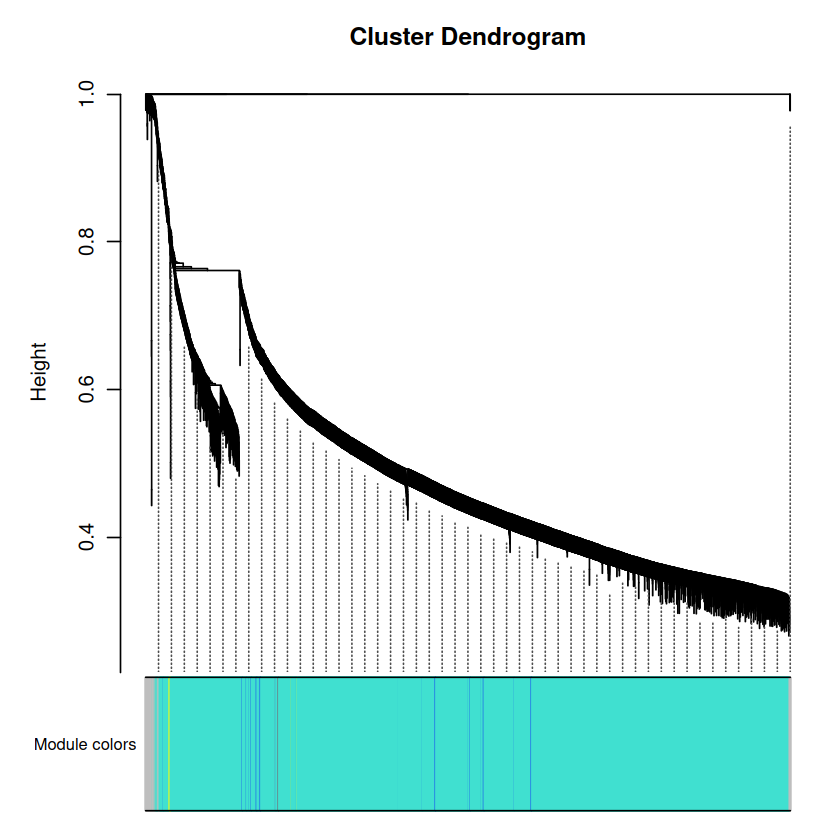

In [ ]:
# Get the number of objects in the first block
block1_indices <- net$blockGenes[[1]]  # Indices for the first block

# Subset colors for the first block
block1_colors <- net$colors[block1_indices]

# Plot dendrogram with colors for the first block
plotDendroAndColors(
  dendro = net$dendrograms[[1]],
  colors = block1_colors,
  "Module colors",
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05
)


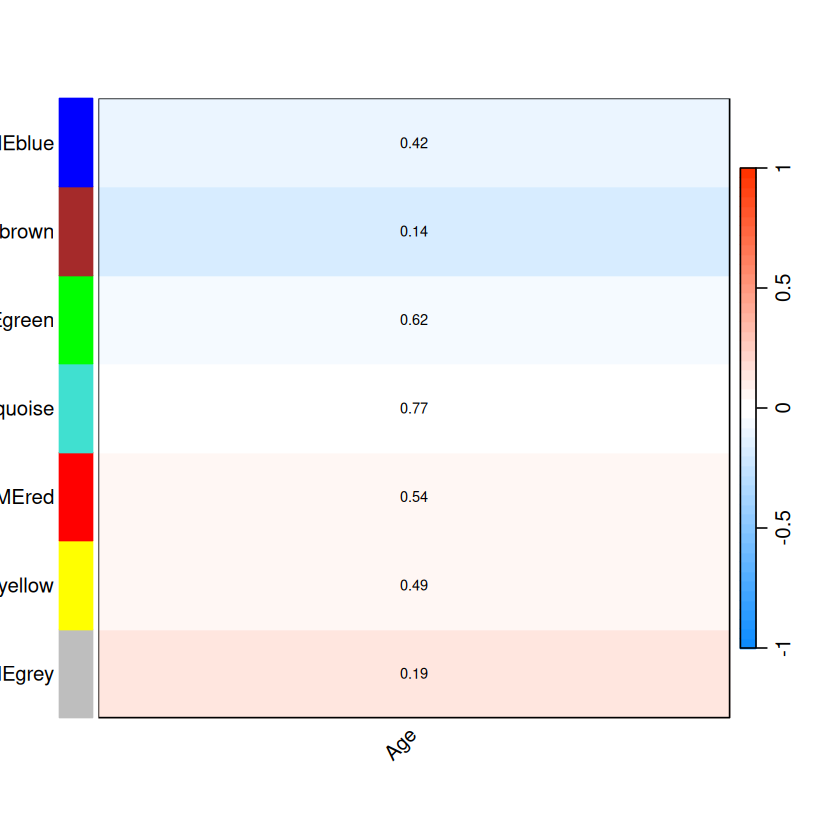

In [ ]:
# Compute correlations between module eigengenes and age
module_trait_cor <- cor(MEs, age, use = "pairwise.complete.obs")
module_trait_p <- corPvalueStudent(module_trait_cor, nSamples = length(age))

# Plot the heatmap
labeledHeatmap(
  Matrix = module_trait_cor,
  xLabels = "Age",
  yLabels = colnames(MEs),
  ySymbols = colnames(MEs),
  colorLabels = FALSE,
  colors = blueWhiteRed(50),
  textMatrix = signif(module_trait_p, 2),
  setStdMargins = FALSE,
  cex.text = 0.7,
  zlim = c(-1, 1)
)


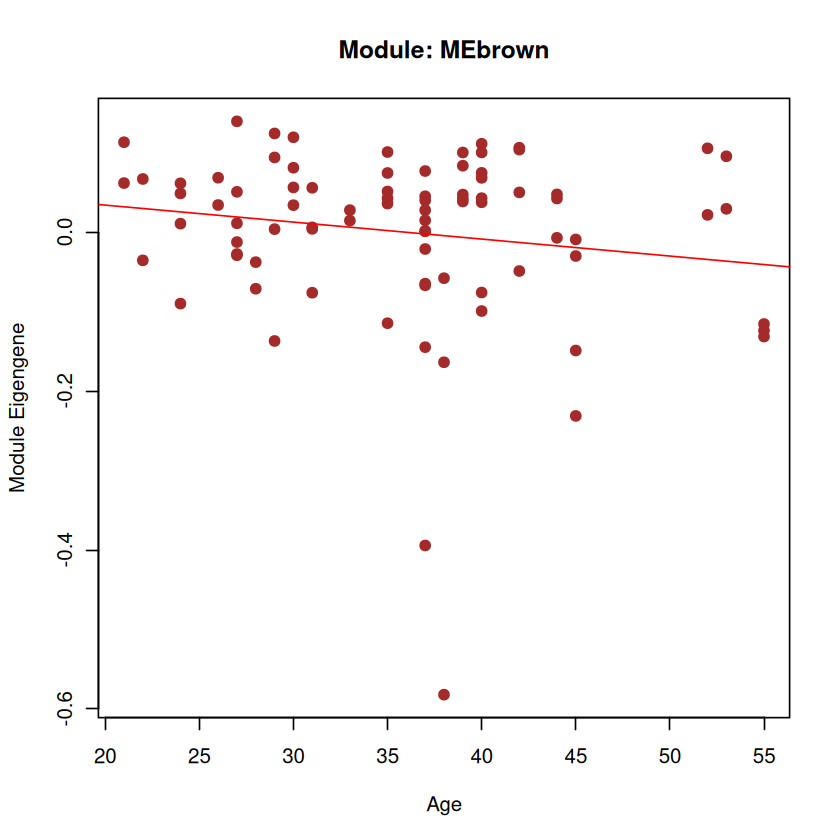

In [34]:
selected_module <- "MEbrown"

# Extract the eigengene for the selected module
selected_eigengene <- MEs[, selected_module]

# Plot eigengene against age
plot(
  age,
  selected_eigengene,
  xlab = "Age",
  ylab = "Module Eigengene",
  main = paste("Module:", selected_module),
  col = "brown",
  pch = 19
)
abline(lm(selected_eigengene ~ age), col = "red")  # Add regression line


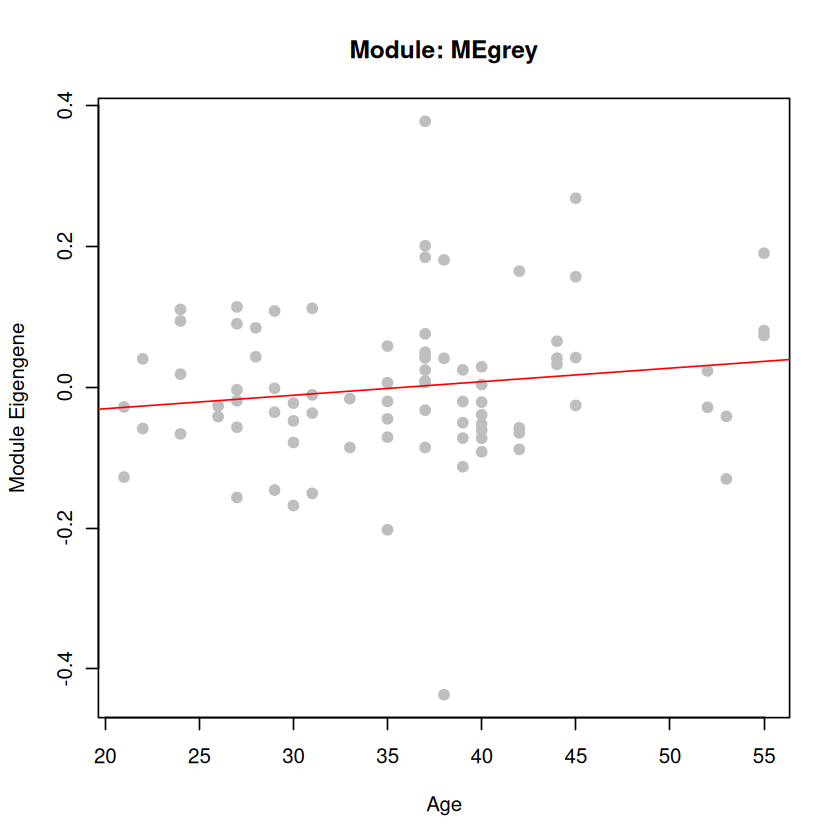

In [35]:
selected_module <- "MEgrey"

# Extract the eigengene for the selected module
selected_eigengene <- MEs[, selected_module]

# Plot eigengene against age
plot(
  age,
  selected_eigengene,
  xlab = "Age",
  ylab = "Module Eigengene",
  main = paste("Module:", selected_module),
  col = "grey",
  pch = 19
)
abline(lm(selected_eigengene ~ age), col = "red")  # Add regression line


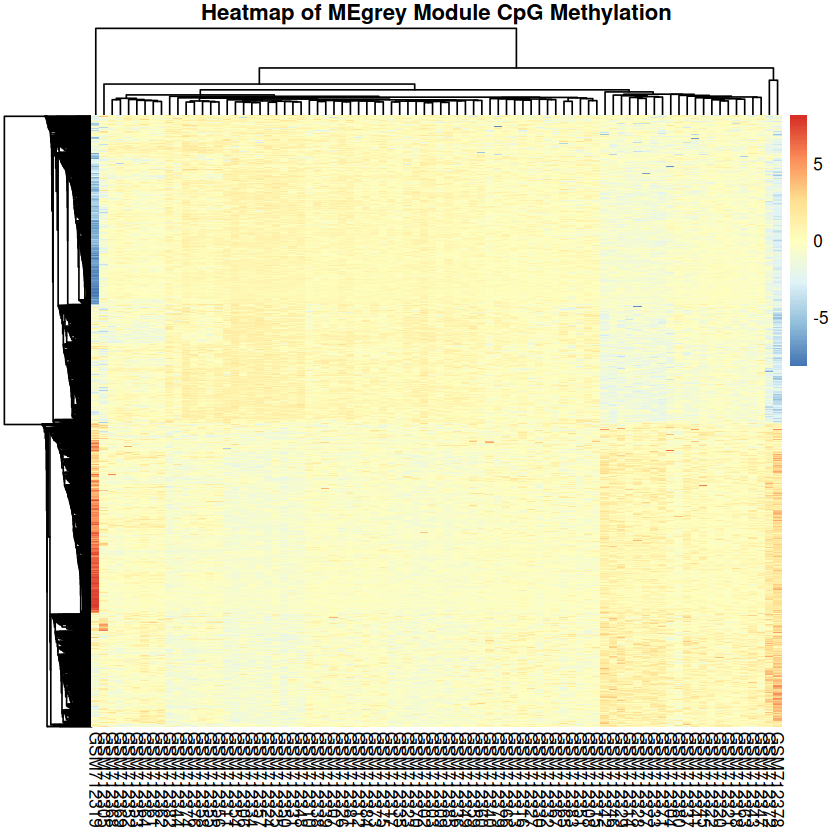

In [44]:
library(pheatmap)

# Select CpG sites from a module
module_cpgs <- names(net$colors[net$colors == "brown"])

# Subset methylation data for these CpG sites
module_data <- filtered_data[module_cpgs, ]

# Plot heatmap
pheatmap(
  module_data, 
  scale = "row", 
  clustering_distance_rows = "correlation", 
  clustering_distance_cols = "euclidean", 
  clustering_method = "average", 
  show_rownames = FALSE, 
  show_colnames = TRUE,
  main = paste("Heatmap of", selected_module, "Module CpG Methylation")
)
